NSGA-II RL Statistics (36 runs)
Distance (m):
  Mean: 112016.04
  Std:  3517.24
  Min:  106491.45
  Max:  119114.36

Runtime (s):
  Mean: 12.46
  Std:  0.30

ACO (Azam) Best Results
Best Distance: 105870.00 m
  Ants: 25
  Iterations: 20
  Runtime: 1.63 s



/tmp/ipykernel_294153/3951002507.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot(box_data, labels=['NSGA-II RL\n(36 runs)', 'ACO (Azam)\n(36 configs)'],
/tmp/ipykernel_294153/3951002507.py:80: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = ax2.boxplot(box_data_time, labels=['NSGA-II RL\n(36 runs)', 'ACO (Azam)\n(36 configs)'],


Plot saved to: /home/raka/NT-NSGA-II/results/algorithm_comparison.png
Detailed Comparison Table
           Metric NSGA-II RL ACO (Azam)
Mean Distance (m)  112016.04  115292.22
 Min Distance (m)  106491.45  105870.00
 Max Distance (m)  119114.36  125040.00
 Std Distance (m)    3517.24    4578.86
 Mean Runtime (s)      12.46       1.13
  Std Runtime (s)       0.30       1.12

Performance Summary
Distance Performance:
  NSGA-II RL is 2.84% better (shorter) than ACO average

Time Performance:
  NSGA-II RL is 11.00x slower than ACO average

Best Solutions:
  NSGA-II RL best: 106491.45 m
  ACO best: 105870.00 m
  Difference: 621.45 m (0.59%)


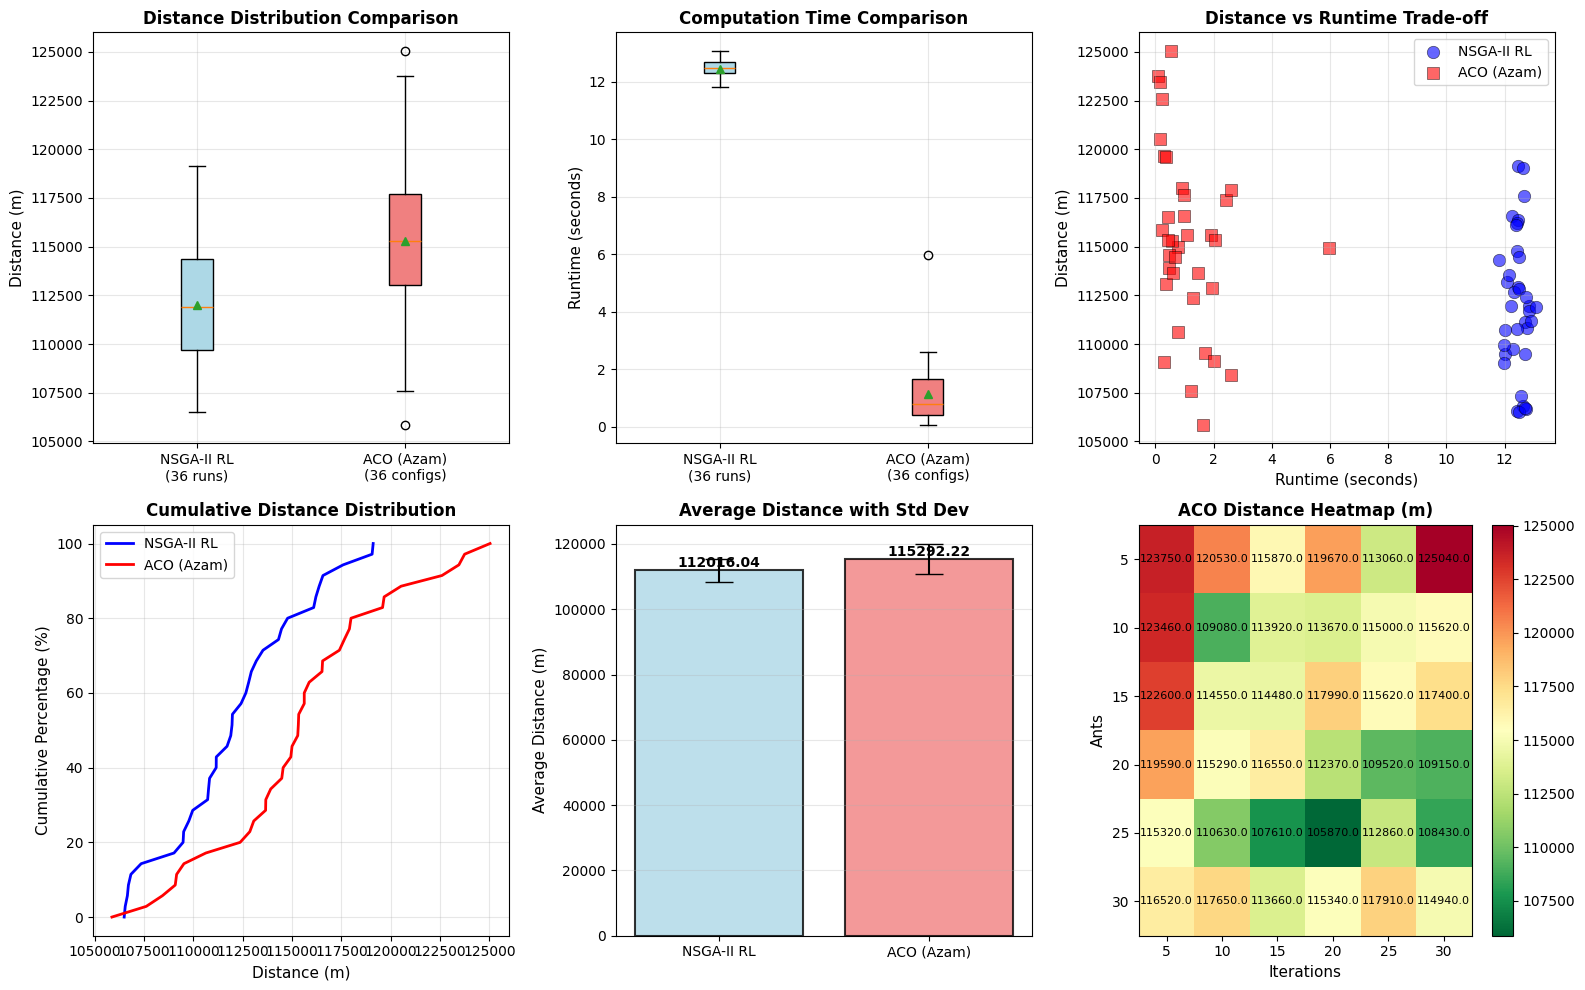

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Read NSGA-II RL results
nsga2_results = []
base_path = Path("/home/raka/NT-NSGA-II/results/GIB_NSGA2_RL_2secs")

for i in range(1, 37):
    json_path = base_path / f"nsga2_rl_run{i}" / "run_summary_aggregated.json"
    try:
        with open(json_path, 'r') as f:
            data = json.load(f)
            nsga2_results.append({
                'run': i,
                'distance': data['sum_final_distance'],
                'runtime': data['total_runtime_s']
            })
    except FileNotFoundError:
        print(f"Warning: {json_path} not found")

nsga2_df = pd.DataFrame(nsga2_results)

# Read Azam's ACO results and convert km to meters
azam_df = pd.read_csv("/home/raka/NT-NSGA-II/results/experiment_azam.csv")
azam_df['Jarak Terbaik (km)'] = azam_df['Jarak Terbaik (km)'] * 1000  # Convert to meters

# Calculate statistics for NSGA-II RL
nsga2_stats = {
    'mean_distance': nsga2_df['distance'].mean(),
    'std_distance': nsga2_df['distance'].std(),
    'min_distance': nsga2_df['distance'].min(),
    'max_distance': nsga2_df['distance'].max(),
    'mean_runtime': nsga2_df['runtime'].mean(),
    'std_runtime': nsga2_df['runtime'].std()
}

print("=" * 60)
print("NSGA-II RL Statistics (36 runs)")
print("=" * 60)
print(f"Distance (m):")
print(f"  Mean: {nsga2_stats['mean_distance']:.2f}")
print(f"  Std:  {nsga2_stats['std_distance']:.2f}")
print(f"  Min:  {nsga2_stats['min_distance']:.2f}")
print(f"  Max:  {nsga2_stats['max_distance']:.2f}")
print(f"\nRuntime (s):")
print(f"  Mean: {nsga2_stats['mean_runtime']:.2f}")
print(f"  Std:  {nsga2_stats['std_runtime']:.2f}")
print()

print("=" * 60)
print("ACO (Azam) Best Results")
print("=" * 60)
best_idx = azam_df['Jarak Terbaik (km)'].idxmin()
print(f"Best Distance: {azam_df.loc[best_idx, 'Jarak Terbaik (km)']:.2f} m")
print(f"  Ants: {int(azam_df.loc[best_idx, 'Jumlah Semut'])}")
print(f"  Iterations: {int(azam_df.loc[best_idx, 'Jumlah Iterasi'])}")
print(f"  Runtime: {azam_df.loc[best_idx, 'Waktu Komputasi (detik)']:.2f} s")
print()

# Create comprehensive comparison plots
fig = plt.figure(figsize=(16, 10))

# 1. Box plot comparison of distances
ax1 = plt.subplot(2, 3, 1)
box_data = [nsga2_df['distance'], azam_df['Jarak Terbaik (km)']]
bp = ax1.boxplot(box_data, labels=['NSGA-II RL\n(36 runs)', 'ACO (Azam)\n(36 configs)'],
                  patch_artist=True, showmeans=True)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('lightcoral')
ax1.set_ylabel('Distance (m)', fontsize=11)
ax1.set_title('Distance Distribution Comparison', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# 2. Runtime comparison
ax2 = plt.subplot(2, 3, 2)
box_data_time = [nsga2_df['runtime'], azam_df['Waktu Komputasi (detik)']]
bp2 = ax2.boxplot(box_data_time, labels=['NSGA-II RL\n(36 runs)', 'ACO (Azam)\n(36 configs)'],
                   patch_artist=True, showmeans=True)
bp2['boxes'][0].set_facecolor('lightblue')
bp2['boxes'][1].set_facecolor('lightcoral')
ax2.set_ylabel('Runtime (seconds)', fontsize=11)
ax2.set_title('Computation Time Comparison', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# 3. Distance vs Runtime scatter
ax3 = plt.subplot(2, 3, 3)
ax3.scatter(nsga2_df['runtime'], nsga2_df['distance'], 
           alpha=0.6, s=80, c='blue', label='NSGA-II RL', edgecolors='black', linewidth=0.5)
ax3.scatter(azam_df['Waktu Komputasi (detik)'], azam_df['Jarak Terbaik (km)'], 
           alpha=0.6, s=80, c='red', marker='s', label='ACO (Azam)', edgecolors='black', linewidth=0.5)
ax3.set_xlabel('Runtime (seconds)', fontsize=11)
ax3.set_ylabel('Distance (m)', fontsize=11)
ax3.set_title('Distance vs Runtime Trade-off', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Cumulative distribution of distances
ax4 = plt.subplot(2, 3, 4)
sorted_nsga2 = np.sort(nsga2_df['distance'])
sorted_azam = np.sort(azam_df['Jarak Terbaik (km)'])
ax4.plot(sorted_nsga2, np.linspace(0, 100, len(sorted_nsga2)), 
        'b-', linewidth=2, label='NSGA-II RL')
ax4.plot(sorted_azam, np.linspace(0, 100, len(sorted_azam)), 
        'r-', linewidth=2, label='ACO (Azam)')
ax4.set_xlabel('Distance (m)', fontsize=11)
ax4.set_ylabel('Cumulative Percentage (%)', fontsize=11)
ax4.set_title('Cumulative Distance Distribution', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Bar chart of averages
ax5 = plt.subplot(2, 3, 5)
algorithms = ['NSGA-II RL', 'ACO (Azam)']
avg_distances = [nsga2_stats['mean_distance'], azam_df['Jarak Terbaik (km)'].mean()]
std_distances = [nsga2_stats['std_distance'], azam_df['Jarak Terbaik (km)'].std()]
bars = ax5.bar(algorithms, avg_distances, yerr=std_distances, 
              capsize=10, color=['lightblue', 'lightcoral'], 
              edgecolor='black', linewidth=1.5, alpha=0.8)
ax5.set_ylabel('Average Distance (m)', fontsize=11)
ax5.set_title('Average Distance with Std Dev', fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3, axis='y')
# Add value labels on bars
for bar, val in zip(bars, avg_distances):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.2f}', ha='center', va='bottom', fontweight='bold')

# 6. ACO parameter sensitivity heatmap
ax6 = plt.subplot(2, 3, 6)
pivot_table = azam_df.pivot_table(
    values='Jarak Terbaik (km)', 
    index='Jumlah Semut', 
    columns='Jumlah Iterasi'
)
im = ax6.imshow(pivot_table.values, cmap='RdYlGn_r', aspect='auto')
ax6.set_xticks(range(len(pivot_table.columns)))
ax6.set_yticks(range(len(pivot_table.index)))
ax6.set_xticklabels(pivot_table.columns)
ax6.set_yticklabels(pivot_table.index)
ax6.set_xlabel('Iterations', fontsize=11)
ax6.set_ylabel('Ants', fontsize=11)
ax6.set_title('ACO Distance Heatmap (m)', fontsize=12, fontweight='bold')
plt.colorbar(im, ax=ax6)

# Add NSGA-II RL average as reference line
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        text = ax6.text(j, i, f'{pivot_table.values[i, j]:.1f}',
                       ha="center", va="center", color="black", fontsize=8)

plt.tight_layout()
plt.savefig('/home/raka/NT-NSGA-II/results/algorithm_comparison.png', dpi=300, bbox_inches='tight')
print(f"Plot saved to: /home/raka/NT-NSGA-II/results/algorithm_comparison.png")

# Create a detailed comparison table
print("=" * 60)
print("Detailed Comparison Table")
print("=" * 60)
comparison_data = {
    'Metric': ['Mean Distance (m)', 'Min Distance (m)', 'Max Distance (m)', 
               'Std Distance (m)', 'Mean Runtime (s)', 'Std Runtime (s)'],
    'NSGA-II RL': [
        f"{nsga2_stats['mean_distance']:.2f}",
        f"{nsga2_stats['min_distance']:.2f}",
        f"{nsga2_stats['max_distance']:.2f}",
        f"{nsga2_stats['std_distance']:.2f}",
        f"{nsga2_stats['mean_runtime']:.2f}",
        f"{nsga2_stats['std_runtime']:.2f}"
    ],
    'ACO (Azam)': [
        f"{azam_df['Jarak Terbaik (km)'].mean():.2f}",
        f"{azam_df['Jarak Terbaik (km)'].min():.2f}",
        f"{azam_df['Jarak Terbaik (km)'].max():.2f}",
        f"{azam_df['Jarak Terbaik (km)'].std():.2f}",
        f"{azam_df['Waktu Komputasi (detik)'].mean():.2f}",
        f"{azam_df['Waktu Komputasi (detik)'].std():.2f}"
    ]
}
comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))
print()

# Performance summary
print("=" * 60)
print("Performance Summary")
print("=" * 60)
distance_improvement = ((azam_df['Jarak Terbaik (km)'].mean() - nsga2_stats['mean_distance']) / 
                        azam_df['Jarak Terbaik (km)'].mean() * 100)
time_comparison = nsga2_stats['mean_runtime'] / azam_df['Waktu Komputasi (detik)'].mean()

print(f"Distance Performance:")
if distance_improvement > 0:
    print(f"  NSGA-II RL is {distance_improvement:.2f}% better (shorter) than ACO average")
else:
    print(f"  ACO is {-distance_improvement:.2f}% better (shorter) than NSGA-II RL average")

print(f"\nTime Performance:")
print(f"  NSGA-II RL is {time_comparison:.2f}x {'slower' if time_comparison > 1 else 'faster'} than ACO average")

best_aco = azam_df['Jarak Terbaik (km)'].min()
best_nsga2 = nsga2_df['distance'].min()
print(f"\nBest Solutions:")
print(f"  NSGA-II RL best: {best_nsga2:.2f} m")
print(f"  ACO best: {best_aco:.2f} m")
print(f"  Difference: {abs(best_nsga2 - best_aco):.2f} m ({((best_nsga2 - best_aco) / best_aco * 100):.2f}%)")

plt.show()